In [4]:
import tensorflow as tf
import numpy as np
from numpy import ndarray
import matplotlib.pyplot as plt
import copy


In [120]:
class Dense:
    def __init__(self,inputAmnt: int, outputAmnt: int):
        self.w = 10*np.random.random_sample(size=(outputAmnt,inputAmnt))
        self.b =  10*np.random.random_sample(size=(outputAmnt,1))
        self.a = None
    def ein(self,x,y):
        return np.einsum("i,j -> ij",np.transpose(x)[0],np.transpose(y)[0])
    def feedfoward(self,a_0):
        self.a = a_0
        return  self.w @ a_0 + self.b

    def backprop(self, alpha,dz):
        changeB = self.b - alpha * dz
        changeW = self.w - alpha * self.ein(dz,self.a)
        if(np.all(np.isfinite(changeB))):
            self.b = changeB
        if(np.all(np.isfinite(changeW))):
            self.w = changeW
        return np.transpose(self.w) @ dz
class softmax:
    def __init__(self):
        self.a_0 = None
    def feedfoward(self,a_0):
        self.a_0 = a_0
        return a_0/(np.sum(a_0)+1e-10)
    
    def backprop(self,alpha,dz):
        summation = np.sum(self.a_0) + 1e-10
        return dz * (1/summation-self.a_0/(summation**2))
class act:
    def __init__(self):
        self.a_0 = None
        self.mask = None
        self.mask1 = None
    def feedfoward(self,a_0):
        self.a_0 = a_0
        self.mask = (a_0 >= 0)
        self.mask1 = (a_0 < 0)
        a = np.zeros_like(a_0)
        a[self.mask] = self.a_0[self.mask]+1
        a[self.mask1] = np.exp(self.a_0[self.mask1])
        return a
    
    def backprop(self,alpha,dz):
        a = np.zeros_like(self.a_0)
        a[self.mask] = 1
        a[self.mask1] = np.exp(self.a_0[self.mask1])
        return dz * a
class ANN:
    def __init__(self,*layers):
        self.layers = list(layers)
    def compute(self,inp):
        output = inp
        for layer in self.layers:
            output = layer.feedfoward(output)
        return output
    def gradDescent(self,inputs,outputs,alpha):
        for (input,output) in zip(inputs,outputs):
            dz = 2*(self.compute(input)-output)
            for layer in self.layers[::-1]:
                dz = layer.backprop(alpha,dz)

In [6]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], -1,1) / 255  # input for training
x_test = x_test.reshape(x_test.shape[0], -1,1) / 255  # input for testing
y_train = y_train.reshape(60_000,1)
def encode(input):
    z = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
    z[0][input] = 1
    return np.transpose(z)
output_test = np.apply_along_axis(encode,1,y_train)

In [121]:
model = ANN(Dense(784,15),act(),softmax(),Dense(15,10),act(),softmax())

In [198]:
model.gradDescent(x_train,output_test,5)

C:\Users\hi_is\AppData\Local\Temp\ipykernel_4364\1327267383.py:32: RuntimeWarning: divide by zero encountered in divide
  return dz * (1/np.sum(self.a_0)-self.a_0/(np.sum(self.a_0)**2))
C:\Users\hi_is\AppData\Local\Temp\ipykernel_4364\1327267383.py:19: RuntimeWarning: invalid value encountered in matmul
  return np.transpose(self.w) @ dz


In [200]:
global x_train,y_train #0.8980166666666667
error = 0
i = 0
for (input,output) in zip(x_train,y_train):
    x = model.compute(input)
    if(not np.all(np.isfinite(x))):
        x = np.zeros_like(x)
    if(np.argmax(x) != output):
        error += 1
    i+=1
print(1-error/60_000)

0.7577666666666667


In [192]:
model1 = copy.deepcopy(model)

In [210]:
global x_test,y_test #
error = 0
i = 0
for (input,output) in zip( x_test,y_test):
    x = model1.compute(input)
    if(not np.all(np.isfinite(x))):
        x = np.zeros_like(x)
    if(np.argmax(x) != output):
        error += 1
    i+=1
print(1-error/10_000)

0.9001


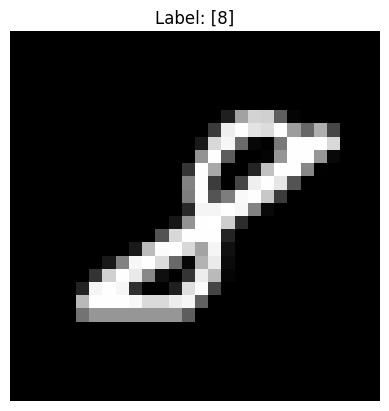

ai prediction 8


In [221]:
imageIndex = 1009
x = x_train[imageIndex].reshape(28,28)
plt.imshow(x,cmap='gray')
plt.title(f"Label: {y_train[imageIndex]}")
plt.axis('off')
plt.show()
print(f"ai prediction {np.argmax(model1.compute(x_train[imageIndex]))}")

In [202]:
k = 25
model.layers[1].feedfoward(model.layers[0].w @ x_train[k] + model.layers[0].b)


array([[1067.18404551],
       [1244.5496394 ],
       [ 863.04530673],
       [1039.56669428],
       [1034.86744111],
       [ 989.34024652],
       [ 903.70382075],
       [ 770.20715381],
       [ 932.34373424],
       [ 838.12100864],
       [ 846.30550135],
       [1162.87802482],
       [ 717.70298691],
       [ 879.983781  ],
       [1423.78632831]])